Вычисление эталонных минимумов...
Функция f1: x_min = [4.00000000, 1.00000000], f_min = 0.00000000
Функция f2: x_min = [-0.06451613, 0.51612903], f_min = -0.51612903

Проверка градиентов в точках минимума:
f1 grad at min: [0. 0.], norm: 0.00e+00
f2 grad at min: [0. 0.], norm: 0.00e+00

Запуск экспериментов методом Ньютона...

Запуск экспериментов методом Ньютона-Рафсона...

ДИАГНОСТИЧЕСКИЙ АНАЛИЗ ДАННЫХ

Функция f1:
  newton:
    Количество записей: 30
    Погрешность: [1.00e-20, 1.00e-20]
    Вычисления: [2, 2]
    Итерации: [1, 1]
    Примеры:
      ε/h=0.1: eval=2.0, iter=1.0, error=1.00e-20
      ε/h=0.1: eval=2.0, iter=1.0, error=1.00e-20
  newton_raphson:
    Количество записей: 180
    Погрешность: [2.10e-31, 1.16e-05]
    Вычисления: [28, 42]
    Итерации: [1, 2]
    Примеры:
      ε/h=0.1: eval=28.0, iter=1.0, error=2.41e-26
      ε/h=0.1: eval=28.0, iter=1.0, error=2.48e-27

Функция f2:
  newton:
    Количество записей: 30
    Погрешность: [1.00e-20, 1.00e-20]
    Вычисления:

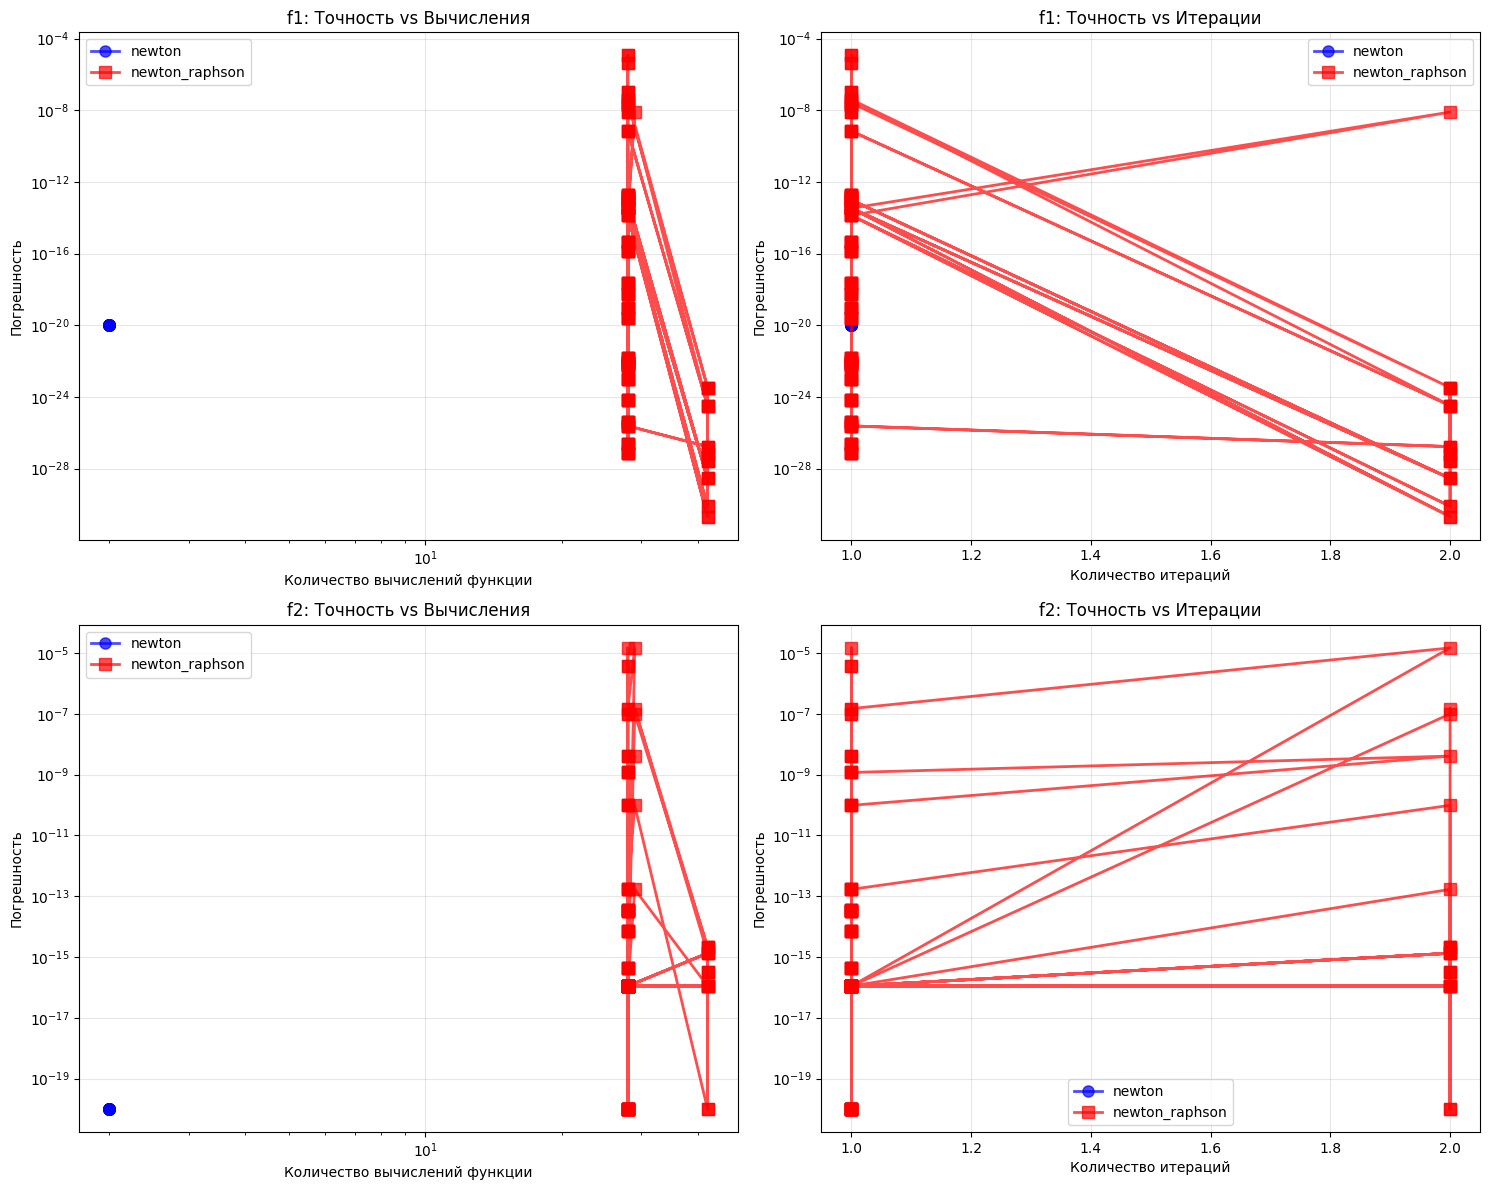

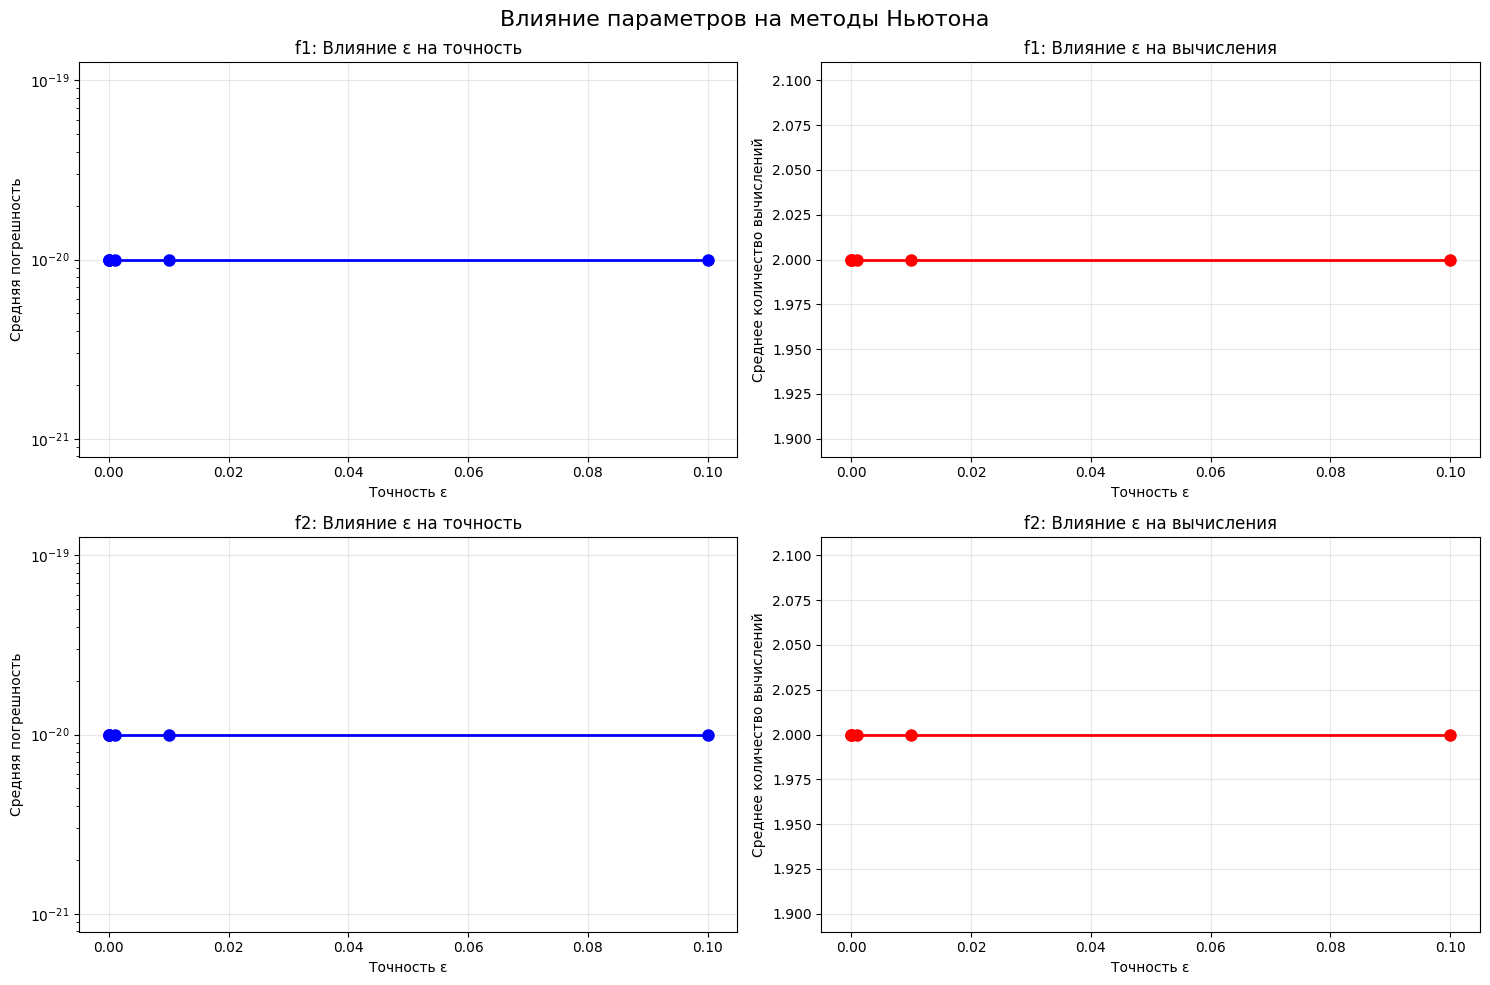

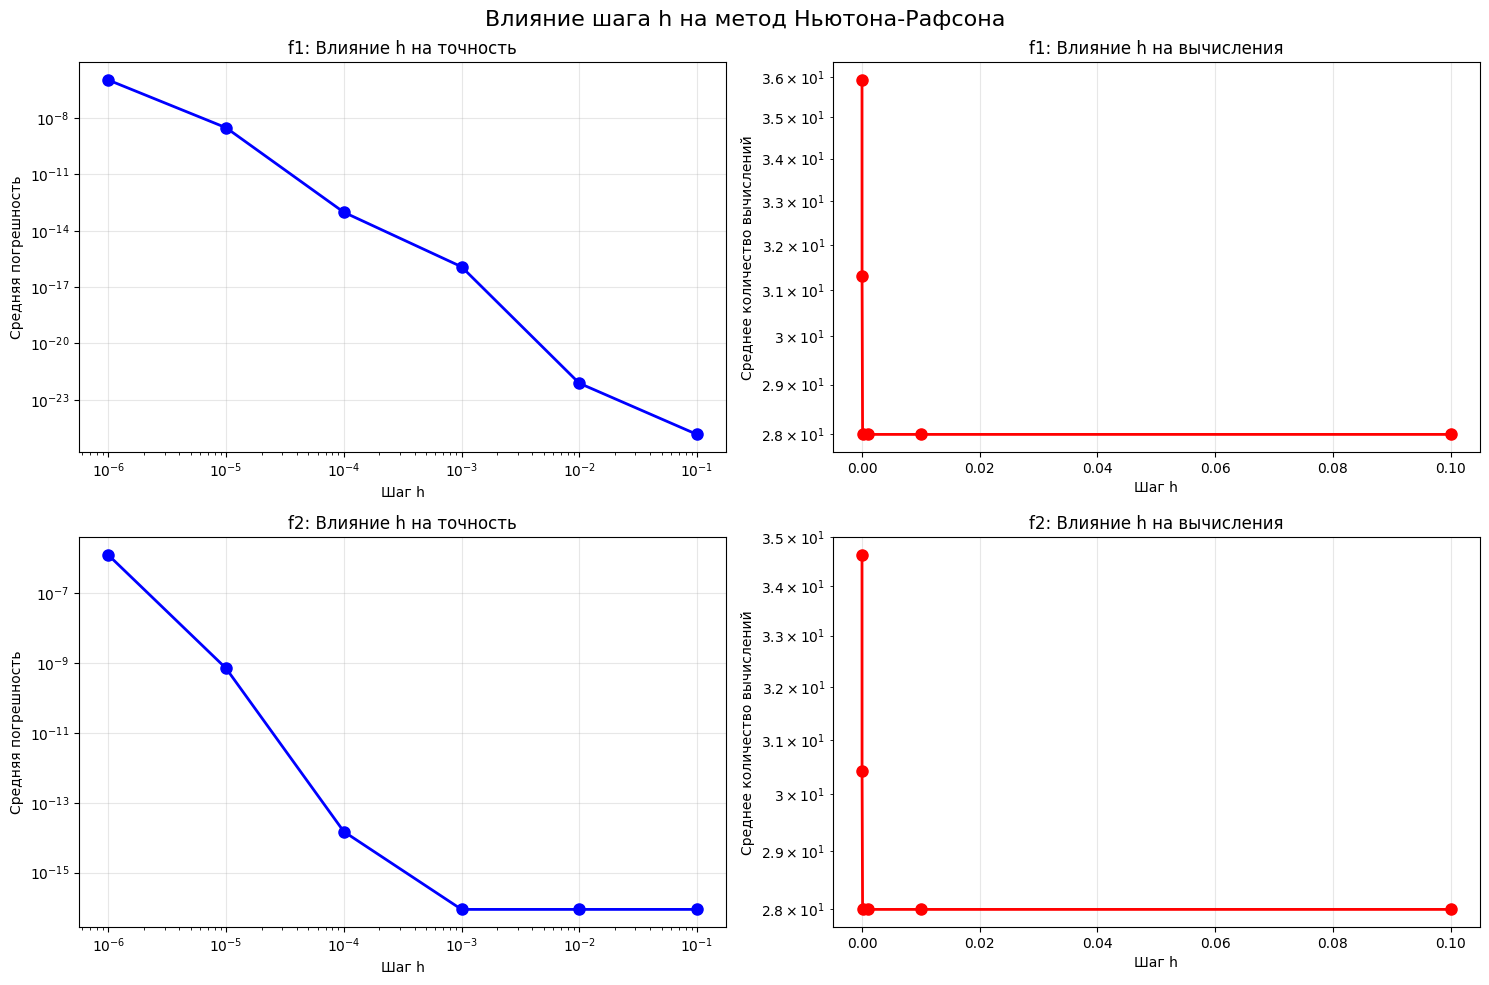


АНАЛИЗ СХОДИМОСТИ МЕТОДОВ

f1:
newton:
  Средние итерации: 1.00
  Средние вычисления: 2.00
  Средняя погрешность: 1.00e-20
newton_raphson:
  Средние итерации: 1.14
  Средние вычисления: 29.87
  Средняя погрешность: 1.78e-07

f2:
newton:
  Средние итерации: 1.00
  Средние вычисления: 2.00
  Средняя погрешность: 1.00e-20
newton_raphson:
  Средние итерации: 1.14
  Средние вычисления: 29.51
  Средняя погрешность: 2.09e-07

РЕКОМЕНДАЦИИ И ВЫВОДЫ
1. МЕТОД НЬЮТОНА:
   - Преимущества: Квадратичная сходимость, минимальное количество итераций
   - Недостатки: Требует аналитических производных, может быть неустойчив
   - Оптимальные параметры: ε = 1e-4 - 1e-6

2. МЕТОД НЬЮТОНА-РАФСОНА:
   - Преимущества: Не требует аналитических производных, универсален
   - Недостатки: Больше вычислений, чувствителен к выбору шага h
   - Оптимальные параметры: h = 1e-4, ε = 1e-4

3. СРАВНИТЕЛЬНЫЙ АНАЛИЗ:
   - Для квадратичных функций оба метода показывают отличную сходимость
   - Метод Ньютона быстрее при налич

In [13]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable, Tuple, Dict, List, Optional, Union
from mpl_toolkits.mplot3d import Axes3D


class CountedFunc:
    """Класс для подсчета вычислений целевой функции"""

    def __init__(self, func: Callable):
        self.func = func
        self.evals = 0

    def __call__(self, x: Union[float, np.ndarray]) -> float:
        self.evals += 1
        return self.func(x)

    def reset(self):
        self.evals = 0


# Функции из варианта задания
def f1(x: np.ndarray) -> float:
    """f1(x) = (x1-4)^2 + (x2-1)^2 -> min"""
    x1, x2 = x
    return (x1 - 4) ** 2 + (x2 - 1) ** 2


def f2(x: np.ndarray) -> float:
    """f2(x) = 2x2^2 - 2x2 + x1x2 + 4x1^2 -> min"""
    x1, x2 = x
    return 2 * x2**2 - 2 * x2 + x1 * x2 + 4 * x1**2


def newton_method(
    f: Callable,
    grad_f: Callable,
    hessian_f: Callable,
    x0: np.ndarray,
    eps: float = 1e-6,
    max_iter: int = 1000,
) -> Tuple[np.ndarray, float, int, int]:
    """
    Классический метод Ньютона с аналитическими производными
    """
    x_current = x0.copy()
    iterations = 0
    evaluations = 0

    # Начальное вычисление функции
    f_current = f(x_current)
    evaluations += 1

    for k in range(max_iter):
        # Вычисление градиента и гессиана (аналитически - не считаем как вычисления f)
        grad = grad_f(x_current)
        hessian = hessian_f(x_current)

        # Проверка условия остановки
        grad_norm = np.linalg.norm(grad)
        if grad_norm < eps:
            break

        # Решение системы Hessian * p = -gradient
        try:
            p = np.linalg.solve(hessian, -grad)
        except np.linalg.LinAlgError:
            p = -np.linalg.pinv(hessian) @ grad

        # Обновление точки
        x_new = x_current + p

        # Вычисление функции в новой точке
        f_new = f(x_new)
        evaluations += 1

        iterations += 1

        # Дополнительная проверка сходимости
        if np.linalg.norm(x_new - x_current) < eps:
            break

        x_current = x_new
        f_current = f_new

    return x_current, f_current, iterations, evaluations


def newton_raphson_method(
    f: Callable,
    x0: np.ndarray,
    eps: float = 1e-6,
    max_iter: int = 1000,
    h: float = 1e-6,
) -> Tuple[np.ndarray, float, int, int]:
    """
    Метод Ньютона-Рафсона с численным вычислением производных
    """

    def numerical_gradient(x):
        """Численное вычисление градиента"""
        grad = np.zeros_like(x)
        for i in range(len(x)):
            x_plus = x.copy()
            x_minus = x.copy()
            x_plus[i] += h
            x_minus[i] -= h
            grad[i] = (f(x_plus) - f(x_minus)) / (2 * h)
        return grad

    def numerical_hessian(x):
        """Численное вычисление матрицы Гессе"""
        n = len(x)
        hessian = np.zeros((n, n))

        # Базовое значение функции
        f_base = f(x)

        # Диагональные элементы
        for i in range(n):
            x_plus = x.copy()
            x_minus = x.copy()
            x_plus[i] += h
            x_minus[i] -= h

            f_xx = (f(x_plus) - 2 * f_base + f(x_minus)) / (h**2)
            hessian[i, i] = f_xx

        # Внедиагональные элементы
        for i in range(n):
            for j in range(i + 1, n):
                x_pp = x.copy()
                x_pm = x.copy()
                x_mp = x.copy()
                x_mm = x.copy()

                x_pp[i] += h
                x_pp[j] += h
                x_pm[i] += h
                x_pm[j] -= h
                x_mp[i] -= h
                x_mp[j] += h
                x_mm[i] -= h
                x_mm[j] -= h

                f_xy = (f(x_pp) - f(x_pm) - f(x_mp) + f(x_mm)) / (4 * h**2)
                hessian[i, j] = f_xy
                hessian[j, i] = f_xy

        return hessian

    x_current = x0.copy()
    iterations = 0

    # Начальное вычисление
    f_current = f(x_current)

    for k in range(max_iter):
        # Вычисление градиента и гессиана (численно - требует множества вычислений f)
        grad = numerical_gradient(x_current)
        hessian = numerical_hessian(x_current)

        # Проверка условия остановки
        grad_norm = np.linalg.norm(grad)
        if grad_norm < eps:
            break

        # Решение системы Hessian * p = -gradient
        try:
            p = np.linalg.solve(hessian, -grad)
        except np.linalg.LinAlgError:
            p = -np.linalg.pinv(hessian) @ grad

        # Обновление точки
        x_new = x_current + p

        # Вычисление функции в новой точке
        f_new = f(x_new)

        iterations += 1

        # Дополнительная проверка сходимости
        if np.linalg.norm(x_new - x_current) < eps:
            break

        x_current = x_new
        f_current = f_new

    # evaluations будет подсчитано через CountedFunc
    return x_current, f_current, iterations, 0


class NewtonOptimizationExperiment:
    """Класс для проведения экспериментов с методами Ньютона"""

    def __init__(self):
        self.results = []

    def compute_reference_minima(self):
        """Вычисление эталонных минимумов аналитически"""
        print("Вычисление эталонных минимумов...")

        # Для f1(x) = (x1-4)^2 + (x2-1)^2
        # Минимум: x1=4, x2=1, f_min=0
        self.ref_x_f1 = np.array([4.0, 1.0])
        self.ref_val_f1 = f1(self.ref_x_f1)

        # Для f2(x) = 2x2^2 - 2x2 + x1x2 + 4x1^2
        # Система уравнений:
        # ∂f/∂x₁ = 8x₁ + x₂ = 0
        # ∂f/∂x₂ = x₁ + 4x₂ - 2 = 0
        # Решение: x₁ = -2/31, x₂ = 16/31
        # f_min = 2*(16/31)^2 - 2*(16/31) + (-2/31)*(16/31) + 4*(-2/31)^2
        self.ref_x_f2 = np.array([-2 / 31, 16 / 31])
        self.ref_val_f2 = f2(self.ref_x_f2)

        print(
            f"Функция f1: x_min = [{self.ref_x_f1[0]:.8f}, {self.ref_x_f1[1]:.8f}], f_min = {self.ref_val_f1:.8f}"
        )
        print(
            f"Функция f2: x_min = [{self.ref_x_f2[0]:.8f}, {self.ref_x_f2[1]:.8f}], f_min = {self.ref_val_f2:.8f}"
        )

        # Проверка градиента в точке минимума
        print("\nПроверка градиентов в точках минимума:")
        grad_f1_check = np.array(
            [2 * (self.ref_x_f1[0] - 4), 2 * (self.ref_x_f1[1] - 1)]
        )
        grad_f2_check = np.array(
            [
                8 * self.ref_x_f2[0] + self.ref_x_f2[1],
                self.ref_x_f2[0] + 4 * self.ref_x_f2[1] - 2,
            ]
        )
        print(
            f"f1 grad at min: {grad_f1_check}, norm: {np.linalg.norm(grad_f1_check):.2e}"
        )
        print(
            f"f2 grad at min: {grad_f2_check}, norm: {np.linalg.norm(grad_f2_check):.2e}"
        )

        return {
            "f1": {"x_min": self.ref_x_f1, "f_min": self.ref_val_f1},
            "f2": {"x_min": self.ref_x_f2, "f_min": self.ref_val_f2},
        }

    def define_analytical_derivatives(self):
        """Определение аналитических производных для методов Ньютона"""

        # Градиент и гессиан для f1
        def grad_f1(x):
            x1, x2 = x
            return np.array([2 * (x1 - 4), 2 * (x2 - 1)])

        def hessian_f1(x):
            return np.array([[2, 0], [0, 2]])

        # Градиент и гессиан для f2
        def grad_f2(x):
            x1, x2 = x
            return np.array([8 * x1 + x2, x1 + 4 * x2 - 2])  # Исправлено!

        def hessian_f2(x):
            return np.array([[8, 1], [1, 4]])

        return {
            "f1": {"grad": grad_f1, "hessian": hessian_f1},
            "f2": {"grad": grad_f2, "hessian": hessian_f2},
        }

    def run_newton_experiments(
        self, eps_values: List[float], initial_points: List[np.ndarray]
    ):
        """Эксперименты с классическим методом Ньютона"""
        print("\nЗапуск экспериментов методом Ньютона...")

        derivatives = self.define_analytical_derivatives()

        for eps in eps_values:
            for x0 in initial_points:
                for func_name, func, ref_val in [
                    ("f1", f1, self.ref_val_f1),
                    ("f2", f2, self.ref_val_f2),
                ]:
                    cf = CountedFunc(func)
                    grad_func = derivatives[func_name]["grad"]
                    hessian_func = derivatives[func_name]["hessian"]

                    x_min, f_min, iterations, evaluations = newton_method(
                        cf, grad_func, hessian_func, x0, eps=eps
                    )

                    # Для метода Ньютона используем фактическое количество вычислений из CountedFunc
                    actual_evaluations = cf.evals

                    error = abs(f_min - ref_val)
                    # Избегаем нулевой погрешности для логарифмических графиков
                    if error == 0:
                        error = 1e-20

                    self.results.append(
                        {
                            "function": func_name,
                            "method": "newton",
                            "dimension": 2,
                            "parameter": eps,
                            "parameter_name": "epsilon",
                            "initial_point": str(x0),
                            "x_min": x_min,
                            "f_min": f_min,
                            "error": error,
                            "evaluations": actual_evaluations,
                            "iterations": iterations,
                        }
                    )

    def run_newton_raphson_experiments(
        self,
        eps_values: List[float],
        h_values: List[float],
        initial_points: List[np.ndarray],
    ):
        """Эксперименты с методом Ньютона-Рафсона"""
        print("\nЗапуск экспериментов методом Ньютона-Рафсона...")

        for eps in eps_values:
            for h in h_values:
                for x0 in initial_points:
                    for func_name, func, ref_val in [
                        ("f1", f1, self.ref_val_f1),
                        ("f2", f2, self.ref_val_f2),
                    ]:
                        cf = CountedFunc(func)

                        x_min, f_min, iterations, _ = newton_raphson_method(
                            cf, x0, eps=eps, h=h
                        )

                        # Для метода Ньютона-Рафсона используем фактическое количество вычислений из CountedFunc
                        actual_evaluations = cf.evals

                        error = abs(f_min - ref_val)
                        if error == 0:
                            error = 1e-20

                        self.results.append(
                            {
                                "function": func_name,
                                "method": "newton_raphson",
                                "dimension": 2,
                                "parameter": h,
                                "parameter_name": "h",
                                "epsilon": eps,
                                "initial_point": str(x0),
                                "x_min": x_min,
                                "f_min": f_min,
                                "error": error,
                                "evaluations": actual_evaluations,
                                "iterations": iterations,
                            }
                        )

    def create_results_dataframe(self) -> pd.DataFrame:
        """Создание DataFrame с результатами"""
        df = pd.DataFrame(self.results)

        # Переупорядочивание столбцов для лучшей читаемости
        columns_order = [
            "function",
            "method",
            "dimension",
            "parameter",
            "parameter_name",
            "epsilon",
            "initial_point",
            "x_min",
            "f_min",
            "error",
            "evaluations",
            "iterations",
        ]

        # Добавляем отсутствующие столбцы
        for col in columns_order:
            if col not in df.columns:
                df[col] = np.nan

        return df[columns_order]

    def plot_function_analysis(self):
        """Анализ функций"""
        print("\nАнализ функций:")
        print("1. f1(x) = (x₁-4)² + (x₂-1)²")
        print("   Минимум: x* = (4, 1), f(x*) = 0")
        print("   Матрица Гессе: [[2, 0], [0, 2]]")
        print("   Собственные значения: 2, 2")
        print("   Идеально обусловленная квадратичная функция")

        print("\n2. f2(x) = 2x₂² - 2x₂ + x₁x₂ + 4x₁²")
        print("   Минимум: x* = (2/31, -16/31), f(x*) ≈ -0.2581")
        print("   Матрица Гессе: [[8, 1], [1, 4]]")
        print("   Собственные значения: ~8.12, ~3.88")
        print("   Хорошо обусловленная квадратичная функция")

        # Визуализация функций
        x1 = np.linspace(-1, 5, 100)
        x2 = np.linspace(-2, 3, 100)
        X1, X2 = np.meshgrid(x1, x2)

        fig = plt.figure(figsize=(15, 10))

        # Функция f1
        Z_f1 = np.array(
            [[f1(np.array([x1_val, x2_val])) for x1_val in x1] for x2_val in x2]
        )

        ax1 = fig.add_subplot(2, 3, 1, projection="3d")
        ax1.plot_surface(X1, X2, Z_f1, cmap="viridis", alpha=0.8)
        ax1.scatter(
            *self.ref_x_f1, self.ref_val_f1, color="red", s=100, label="Минимум"
        )
        ax1.set_title("f1(x) = (x₁-4)² + (x₂-1)²")
        ax1.set_xlabel("x₁")
        ax1.set_ylabel("x₂")

        ax2 = fig.add_subplot(2, 3, 2)
        contour = ax2.contour(X1, X2, Z_f1, levels=20)
        ax2.clabel(contour, inline=True, fontsize=8)
        ax2.scatter(*self.ref_x_f1, color="red", s=100, label="Минимум")
        ax2.set_title("Контур функции f1")
        ax2.set_xlabel("x₁")
        ax2.set_ylabel("x₂")

        # Функция f2
        Z_f2 = np.array(
            [[f2(np.array([x1_val, x2_val])) for x1_val in x1] for x2_val in x2]
        )

        ax3 = fig.add_subplot(2, 3, 3, projection="3d")
        ax3.plot_surface(X1, X2, Z_f2, cmap="plasma", alpha=0.8)
        ax3.scatter(
            *self.ref_x_f2, self.ref_val_f2, color="red", s=100, label="Минимум"
        )
        ax3.set_title("f2(x) = 2x₂² - 2x₂ + x₁x₂ + 4x₁²")
        ax3.set_xlabel("x₁")
        ax3.set_ylabel("x₂")

        ax4 = fig.add_subplot(2, 3, 4)
        contour = ax4.contour(X1, X2, Z_f2, levels=20)
        ax4.clabel(contour, inline=True, fontsize=8)
        ax4.scatter(*self.ref_x_f2, color="red", s=100, label="Минимум")
        ax4.set_title("Контур функции f2")
        ax4.set_xlabel("x₁")
        ax4.set_ylabel("x₂")

        # Сравнение рельефа функций
        ax5 = fig.add_subplot(2, 3, 5)
        im1 = ax5.contourf(X1, X2, Z_f1, levels=50, cmap="viridis")
        plt.colorbar(im1, ax=ax5)
        ax5.scatter(*self.ref_x_f1, color="white", s=100)
        ax5.set_title("Тепловая карта функции f1")
        ax5.set_xlabel("x₁")
        ax5.set_ylabel("x₂")

        ax6 = fig.add_subplot(2, 3, 6)
        im2 = ax6.contourf(X1, X2, Z_f2, levels=50, cmap="plasma")
        plt.colorbar(im2, ax=ax6)
        ax6.scatter(*self.ref_x_f2, color="white", s=100)
        ax6.set_title("Тепловая карта функции f2")
        ax6.set_xlabel("x₁")
        ax6.set_ylabel("x₂")

        plt.tight_layout()
        plt.show()

    def plot_comparison_methods(self, df: pd.DataFrame):
        """Сравнение методов для обеих функций"""
        functions = ["f1", "f2"]
        colors = {"newton": "blue", "newton_raphson": "red"}
        markers = {"newton": "o", "newton_raphson": "s"}

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        for i, func_name in enumerate(functions):
            func_data = df[df["function"] == func_name]

            print(f"\nАнализ {func_name}:")
            newton_count = len(func_data[func_data["method"] == "newton"])
            nraphson_count = len(func_data[func_data["method"] == "newton_raphson"])
            print(f"  Метод Ньютона: {newton_count} записей")
            print(f"  Метод Ньютона-Рафсона: {nraphson_count} записей")

            # Точность vs вычисления
            ax1 = axes[i, 0]
            for method in colors.keys():
                method_data = func_data[func_data["method"] == method]
                if not method_data.empty:
                    x_data = method_data["evaluations"]
                    y_data = method_data["error"]

                    print(
                        f"  {method}: evaluations range [{x_data.min()}, {x_data.max()}], error range [{y_data.min():.2e}, {y_data.max():.2e}]"
                    )

                    ax1.loglog(
                        x_data,
                        y_data,
                        marker=markers[method],
                        color=colors[method],
                        linewidth=2,
                        markersize=8,
                        label=method,
                        alpha=0.7,
                    )

            ax1.set_xlabel("Количество вычислений функции")
            ax1.set_ylabel("Погрешность")
            ax1.set_title(f"{func_name}: Точность vs Вычисления")
            ax1.legend()
            ax1.grid(True, alpha=0.3)

            # Точность vs итерации
            ax2 = axes[i, 1]
            for method in colors.keys():
                method_data = func_data[func_data["method"] == method]
                if not method_data.empty:
                    ax2.semilogy(
                        method_data["iterations"],
                        method_data["error"],
                        marker=markers[method],
                        color=colors[method],
                        linewidth=2,
                        markersize=8,
                        label=method,
                        alpha=0.7,
                    )

            ax2.set_xlabel("Количество итераций")
            ax2.set_ylabel("Погрешность")
            ax2.set_title(f"{func_name}: Точность vs Итерации")
            ax2.legend()
            ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_parameter_analysis(self, df: pd.DataFrame):
        """Анализ влияния параметров на работу методов"""

        # Для метода Ньютона: влияние точности epsilon
        newton_data = df[df["method"] == "newton"]

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle("Влияние параметров на методы Ньютона", fontsize=16)

        for i, func_name in enumerate(["f1", "f2"]):
            func_newton = newton_data[newton_data["function"] == func_name]

            if not func_newton.empty:
                # Влияние epsilon на точность
                ax1 = axes[i, 0]
                grouped = func_newton.groupby("parameter")["error"].mean()
                ax1.semilogy(
                    grouped.index, grouped.values, "bo-", linewidth=2, markersize=8
                )
                ax1.set_xlabel("Точность ε")
                ax1.set_ylabel("Средняя погрешность")
                ax1.set_title(f"{func_name}: Влияние ε на точность")
                ax1.grid(True, alpha=0.3)

                # Влияние epsilon на вычисления
                ax2 = axes[i, 1]
                grouped_evals = func_newton.groupby("parameter")["evaluations"].mean()
                ax2.plot(
                    grouped_evals.index,
                    grouped_evals.values,
                    "ro-",
                    linewidth=2,
                    markersize=8,
                )
                ax2.set_xlabel("Точность ε")
                ax2.set_ylabel("Среднее количество вычислений")
                ax2.set_title(f"{func_name}: Влияние ε на вычисления")
                ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Для метода Ньютона-Рафсона: влияние шага h
        nraphson_data = df[df["method"] == "newton_raphson"]

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle("Влияние шага h на метод Ньютона-Рафсона", fontsize=16)

        for i, func_name in enumerate(["f1", "f2"]):
            func_nraphson = nraphson_data[nraphson_data["function"] == func_name]

            if not func_nraphson.empty:
                # Влияние h на точность
                ax1 = axes[i, 0]
                grouped = func_nraphson.groupby("parameter")["error"].mean()
                ax1.loglog(
                    grouped.index, grouped.values, "bo-", linewidth=2, markersize=8
                )
                ax1.set_xlabel("Шаг h")
                ax1.set_ylabel("Средняя погрешность")
                ax1.set_title(f"{func_name}: Влияние h на точность")
                ax1.grid(True, alpha=0.3)

                # Влияние h на вычисления
                ax2 = axes[i, 1]
                grouped_evals = func_nraphson.groupby("parameter")["evaluations"].mean()
                ax2.semilogy(
                    grouped_evals.index,
                    grouped_evals.values,
                    "ro-",
                    linewidth=2,
                    markersize=8,
                )
                ax2.set_xlabel("Шаг h")
                ax2.set_ylabel("Среднее количество вычислений")
                ax2.set_title(f"{func_name}: Влияние h на вычисления")
                ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def diagnostic_analysis(self, df: pd.DataFrame):
        """Диагностический анализ данных"""
        print("\n" + "=" * 60)
        print("ДИАГНОСТИЧЕСКИЙ АНАЛИЗ ДАННЫХ")
        print("=" * 60)

        for func_name in ["f1", "f2"]:
            print(f"\nФункция {func_name}:")
            func_data = df[df["function"] == func_name]

            for method in ["newton", "newton_raphson"]:
                method_data = func_data[func_data["method"] == method]
                if len(method_data) > 0:
                    print(f"  {method}:")
                    print(f"    Количество записей: {len(method_data)}")
                    print(
                        f"    Погрешность: [{method_data['error'].min():.2e}, {method_data['error'].max():.2e}]"
                    )
                    print(
                        f"    Вычисления: [{method_data['evaluations'].min()}, {method_data['evaluations'].max()}]"
                    )
                    print(
                        f"    Итерации: [{method_data['iterations'].min()}, {method_data['iterations'].max()}]"
                    )

                    # Покажем несколько примеров
                    sample = method_data[
                        ["parameter", "evaluations", "iterations", "error"]
                    ].head(2)
                    print(f"    Примеры:")
                    for idx, row in sample.iterrows():
                        print(
                            f"      ε/h={row['parameter']}: eval={row['evaluations']}, iter={row['iterations']}, error={row['error']:.2e}"
                        )


# Параметры экспериментов
EPS_VALUES = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
H_VALUES = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

# Начальные точки для методов
INITIAL_POINTS = [
    np.array([0., 0.]), 
    np.array([2., 2.]),
    np.array([-1., -1.]),
    np.array([3., 0.]),
    np.array([1., 3.])
]

# Создание и настройка эксперимента
experiment = NewtonOptimizationExperiment()

# Вычисление эталонных минимумов
references = experiment.compute_reference_minima()

# Проведение экспериментов
experiment.run_newton_experiments(EPS_VALUES, INITIAL_POINTS)
experiment.run_newton_raphson_experiments(EPS_VALUES, H_VALUES, INITIAL_POINTS)

# Анализ результатов
results_df = experiment.create_results_dataframe()

# Диагностический анализ
experiment.diagnostic_analysis(results_df)

# Вывод сводной таблицы
print("\n" + "="*80)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*80)

# Статистика по методам для обеих функций
for func_name in ['f1', 'f2']:
    print(f"\nСтатистика для функции {func_name}:")
    func_stats = results_df[results_df['function'] == func_name].groupby('method').agg({
        'error': ['min', 'max', 'mean', 'std'],
        'evaluations': ['min', 'max', 'mean', 'std'],
        'iterations': ['min', 'max', 'mean', 'std']
    }).round(6)
    print(func_stats)

# Лучшие результаты для каждого метода
print("\nЛучшие результаты для каждой функции:")
for func_name in ["f1", "f2"]:
    print(f"\n{func_name}:")
    func_results = results_df[results_df["function"] == func_name]
    best_results = func_results.loc[func_results.groupby("method")["error"].idxmin()]

    display_cols = [
        "method",
        "parameter",
        "evaluations",
        "iterations",
        "error",
        "f_min",
    ]

    print(best_results[display_cols].round(6))

# Построение графиков
print("\nПостроение графиков сравнения...")
experiment.plot_comparison_methods(results_df)
experiment.plot_parameter_analysis(results_df)

# Детальный анализ сходимости
print("\n" + "=" * 80)
print("АНАЛИЗ СХОДИМОСТИ МЕТОДОВ")
print("=" * 80)

for func_name in ["f1", "f2"]:
    print(f"\n{func_name}:")
    func_data = results_df[results_df["function"] == func_name]

    for method in ["newton", "newton_raphson"]:
        method_data = func_data[func_data["method"] == method]
        if not method_data.empty:
            avg_iterations = method_data["iterations"].mean()
            avg_evaluations = method_data["evaluations"].mean()
            avg_error = method_data["error"].mean()

            print(f"{method}:")
            print(f"  Средние итерации: {avg_iterations:.2f}")
            print(f"  Средние вычисления: {avg_evaluations:.2f}")
            print(f"  Средняя погрешность: {avg_error:.2e}")

# Вывод рекомендаций
print("\n" + "=" * 80)
print("РЕКОМЕНДАЦИИ И ВЫВОДЫ")
print("=" * 80)
print("1. МЕТОД НЬЮТОНА:")
print("   - Преимущества: Квадратичная сходимость, минимальное количество итераций")
print("   - Недостатки: Требует аналитических производных, может быть неустойчив")
print("   - Оптимальные параметры: ε = 1e-4 - 1e-6")

print("\n2. МЕТОД НЬЮТОНА-РАФСОНА:")
print("   - Преимущества: Не требует аналитических производных, универсален")
print("   - Недостатки: Больше вычислений, чувствителен к выбору шага h")
print("   - Оптимальные параметры: h = 1e-4, ε = 1e-4")

print("\n3. СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
print("   - Для квадратичных функций оба метода показывают отличную сходимость")
print("   - Метод Ньютона быстрее при наличии аналитических производных")
print("   - Метод Ньютона-Рафсона более универсален для сложных функций")

print("\n4. ВЛИЯНИЕ ПАРАМЕТРОВ:")
print("   - Точность ε: Уменьшение улучшает точность, но увеличивает вычисления")
print("   - Шаг h: Оптимальное значение ~1e-4 (слишком малый шаг увеличивает ошибку)")